***Instrucciones***  
Realizar un análisis no supervisado sobre el dataset 'analisis.csv' que contiene datos sobre famosos y que  
esta basado en una metodología de psicología conocida como “Ocean: The Big Five”.  
Disponemos de las siguientes características de entrada:  
- usuario (el nombre en Twitter)  
- “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte  
- “co” =Conscientiousness – grado de orden, prolijidad, organización  
- “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social  
- “ag” = Agreeableness – grado de empatía con los demás, temperamento  
- “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.  
- Wordcount – Cantidad promedio de palabras usadas en sus tweets  
- Categoria – Actividad laboral del usuario (actor, cantante, etc.)  
  
Eliminando la columna 'Categoría', realizar la tarea usando los 3 algoritmos de ANS:  
K-Means, DBScan y Jerárquico.  
Podemos suponer que, para 'profesiones' similares tendremos 'carácteres' similares.  
Se debe investigar los posibles clústers que se pueden generar.  
Es interesante realizar un EDA previo con los datos completos, para tener una idea inicial.

In [1]:
# Importamos las libreris necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [2]:
# Cargar el dataset
try:
    df = pd.read_csv("analisis.csv")
except FileNotFoundError:
    print("Error: El archivo 'analisis.csv' no se encontro. Asegurate de que este en el mismo directorio que este script o especifica la ruta correcta.")
    exit()

In [3]:
# --- Análisis Exploratorio de Datos (EDA) ---
print("Forma del dataset:", df.shape)
print(df.head())
print(df.describe())
print(df.info())


Forma del dataset: (140, 8)
           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  
               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756

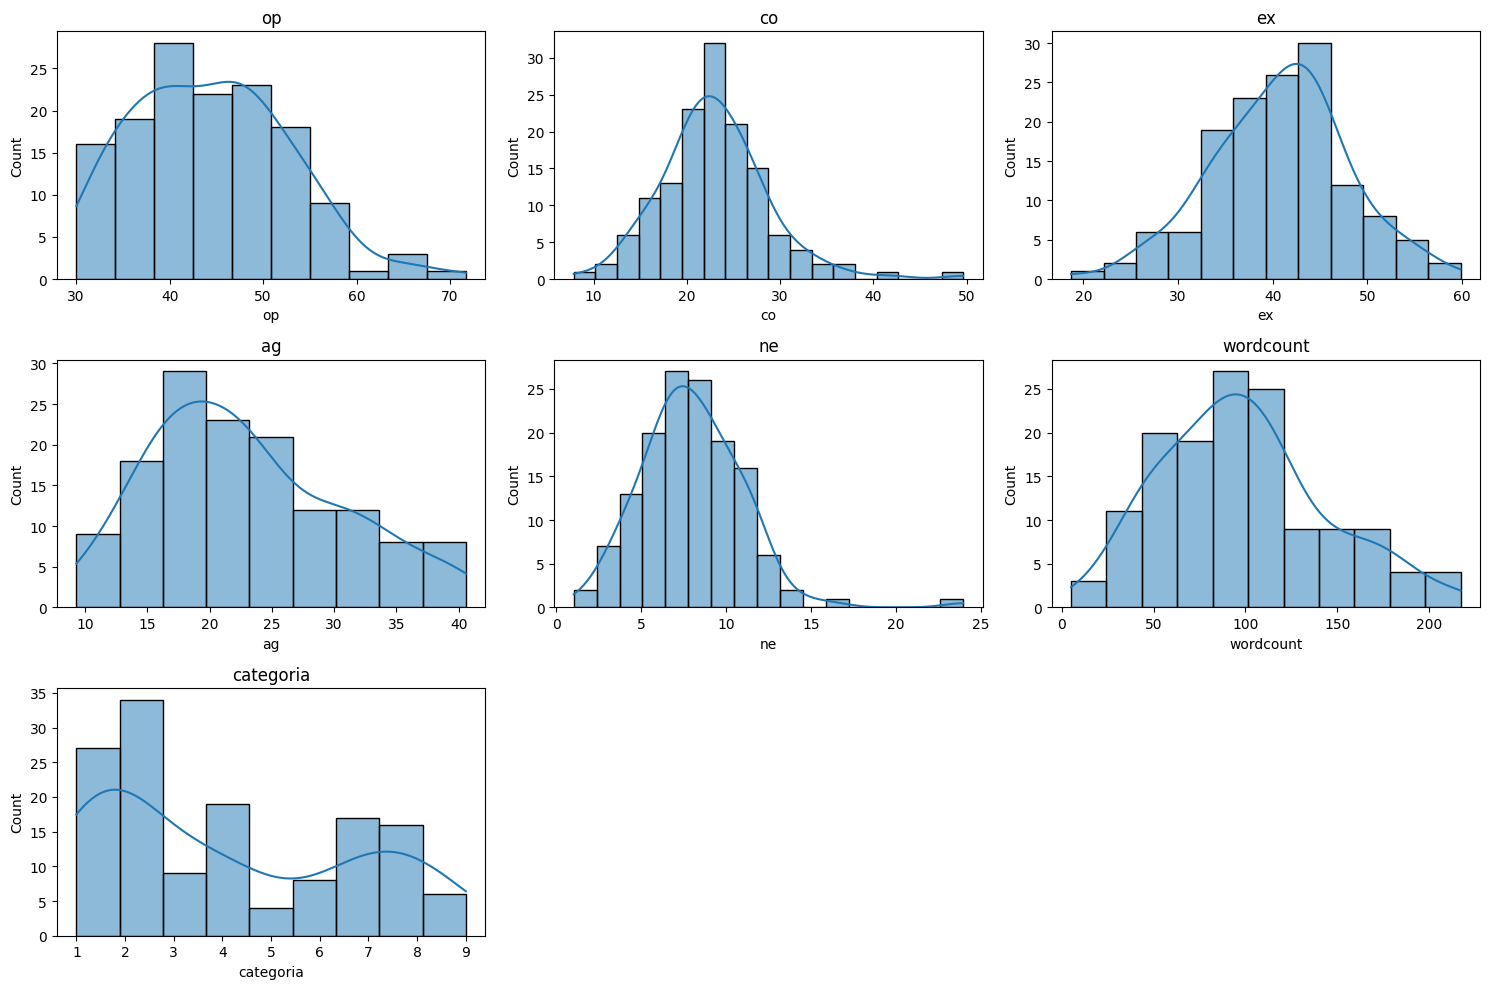

In [4]:
# Visualizar la distribución de las características
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

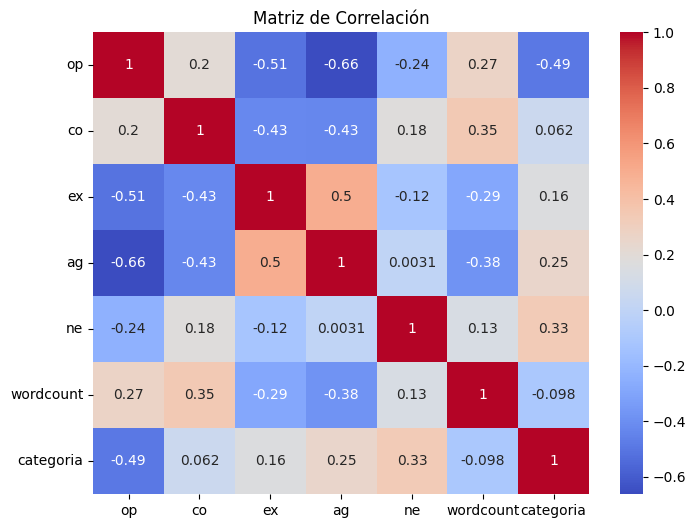

In [5]:
# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [6]:
# Eliminar las columnas 'categoria' y 'usuario' para el análisis no supervisado
df_cluster = df.drop(["categoria", "usuario"], axis=1)

# --- Preprocesamiento de Datos ---
# Escalamiento de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


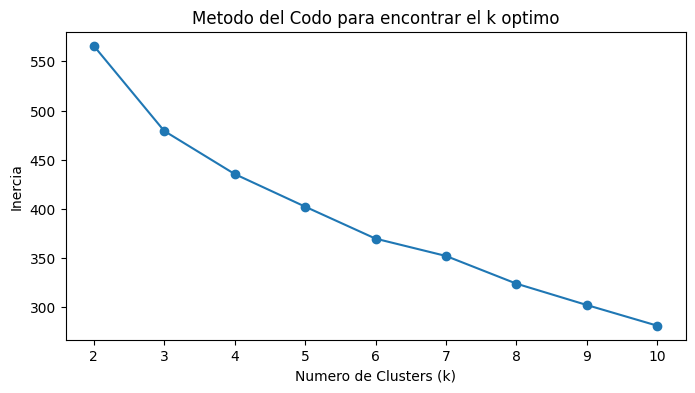

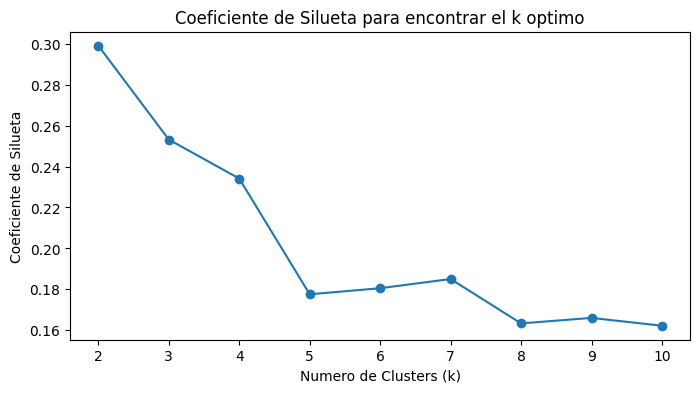


Analisis de Clusters K-Means:
                      op         co         ex         ag         ne  \
KMeans_labels                                                          
0              40.419642  17.968439  49.226099  26.668020   5.339692   
1              54.325151  22.236260  37.420215  17.057805   6.024372   
2              42.536459  24.412220  37.979637  21.932325  10.798271   
3              45.730864  30.324896  37.248107  18.123692   8.680374   
4              41.312029  21.208409  38.107654  22.081232  11.397812   
5              35.390636  19.830800  45.833333  35.309918   8.297551   

                wordcount  
KMeans_labels              
0               67.666359  
1              114.525856  
2              175.249388  
3              109.251383  
4               63.001731  
5               63.361770  


In [7]:
# --- K-Means Clustering ---
# Encontrar el k óptimo usando el Método del Codo y el Coeficiente de Silueta
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Metodo del Codo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker="o")
plt.title("Metodo del Codo para encontrar el k optimo")
plt.xlabel("Numero de Clusters (k)")
plt.ylabel("Inercia")
plt.show()

# Coeficiente de Silueta
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker="o")
plt.title("Coeficiente de Silueta para encontrar el k optimo")
plt.xlabel("Numero de Clusters (k)")
plt.ylabel("Coeficiente de Silueta")
plt.show()

# Elegir k basado en el metodo del codo y el coeficiente de silueta (digamos 6)
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
df_cluster["KMeans_labels"] = kmeans.fit_predict(df_scaled)

# Analizar los clusters de K-Means
print("\nAnalisis de Clusters K-Means:")
kmeans_analysis = df_cluster.groupby("KMeans_labels").mean()
print(kmeans_analysis)

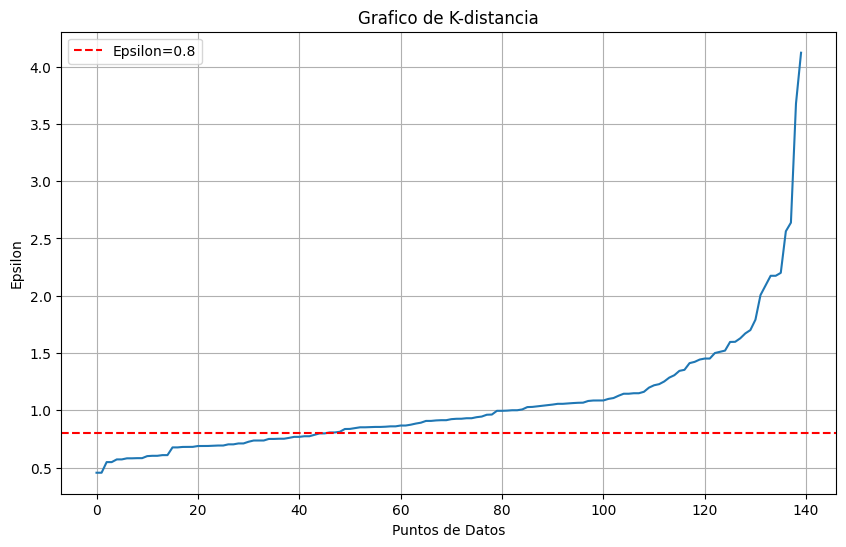


Analisis de Clusters DBSCAN:
No se encontraron clusters validos. Todos los puntos fueron identificados como ruido.
Numero de clusters encontrados: 0
Numero de puntos de ruido: 140


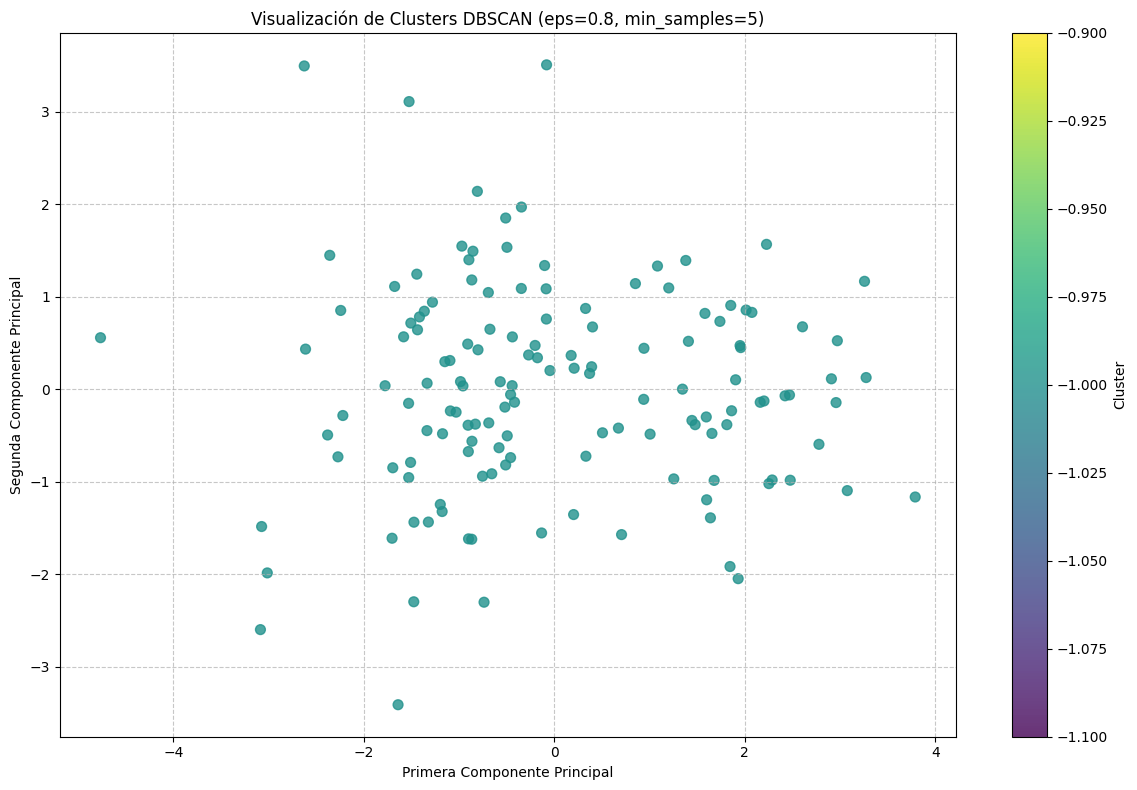

In [8]:
# --- DBSCAN Clustering ---
# Encontrar el epsilon optimo usando el grafico de k-distancia

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Grafico de K-distancia")
plt.xlabel("Puntos de Datos")
plt.ylabel("Epsilon")
plt.axhline(y=0.8, color='r', linestyle='--', label='Epsilon=0.8')
plt.legend()
plt.grid(True)
plt.show()

# Observando el gráfico, un buen punto de inflexión es alrededor de 0.8
# Elegir epsilon y min_samples basado en el grafico de k-distancia
epsilon = 0.4
min_samples = 4
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)
df_cluster["DBSCAN_labels"] = clusters

# Analizar los clusters de DBSCAN
print("\nAnalisis de Clusters DBSCAN:")
# Filtramos los puntos de ruido (etiqueta -1) para evitar errores
valid_clusters = df_cluster[df_cluster["DBSCAN_labels"] != -1]
if len(valid_clusters) > 0:
    # Seleccionamos solo columnas numericas para calcular la media
    numeric_columns = valid_clusters.select_dtypes(include=['number']).columns
    dbscan_analysis = valid_clusters.groupby("DBSCAN_labels")[numeric_columns].mean()
    print(dbscan_analysis)
else:
    print("No se encontraron clusters validos. Todos los puntos fueron identificados como ruido.")
    
# Mostrar cantidad de clusters y puntos de ruido
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"Numero de clusters encontrados: {n_clusters}")
print(f"Numero de puntos de ruido: {n_noise}")

# Añadir la informacion del cluster al dataframe original para referencia posterior
df["DBSCAN_cluster"] = clusters

# Visualizacion de los clusters en 2D usando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualización de Clusters DBSCAN (eps=0.8, min_samples=5)')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



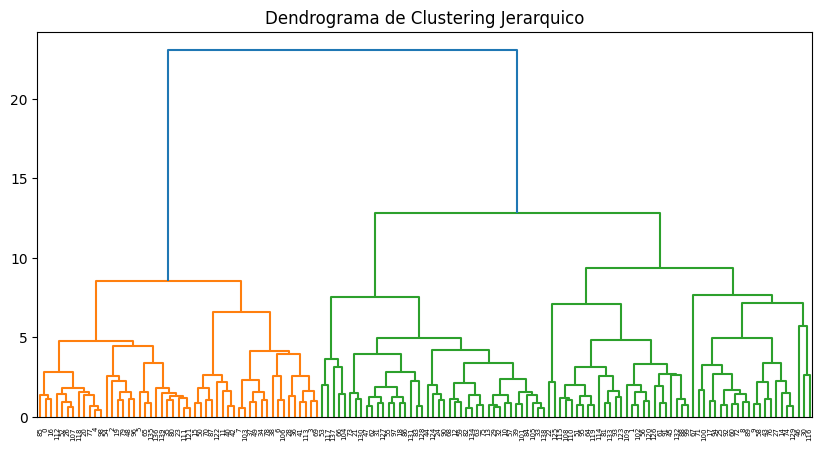


Análisis de Clusters Jerarquico:
                            op         co         ex         ag         ne  \
Hierarchical_labels                                                          
0                    53.800834  23.282510  37.193500  16.778179   6.500428   
1                    43.104253  26.398868  37.655444  19.927586   9.477620   
2                    42.697825  25.795089  37.545223  21.149767  11.417710   
3                    40.425347  17.677052  49.573479  26.759858   5.371435   
4                    36.302627  20.640662  44.550589  33.321475   8.599413   
5                    48.587099  49.637863  26.988702   9.948168   2.979542   

                      wordcount  KMeans_labels  DBSCAN_labels  
Hierarchical_labels                                            
0                    113.298859       1.365854           -1.0  
1                     85.539831       3.384615           -1.0  
2                    165.381333       2.380952           -1.0  
3                    

In [9]:
# --- Clustering Jerarquico ---
# Dendrograma
linked = linkage(df_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation="top")
plt.title("Dendrograma de Clustering Jerarquico")
plt.show()

# Elegir el numero de clusters basado en el dendrograma (digamos 4)
hierarchical = AgglomerativeClustering(n_clusters=6, linkage="ward")
df_cluster["Hierarchical_labels"] = hierarchical.fit_predict(df_scaled)

# Analizar los clusters jerárquicos
print("\nAnálisis de Clusters Jerarquico:")
hierarchical_analysis = df_cluster.groupby("Hierarchical_labels").mean()
print(hierarchical_analysis)



In [14]:
# --- Comparacion de los algoritmos ---
df_cluster['usuario'] = df['usuario']
comparacion = pd.DataFrame({
    'usuario': df_cluster['usuario'],
    'kmeans': df_cluster['KMeans_labels'],
    'dbscan': df_cluster['DBSCAN_labels'],
    'jerarquico': df_cluster['Hierarchical_labels']
})
print(comparacion.head(10))



           usuario  kmeans  dbscan  jerarquico
0     3gerardpique       5      -1           4
1  aguerosergiokun       4      -1           1
2   albertochicote       5      -1           4
3    AlejandroSanz       0      -1           3
4   alfredocasero1       5      -1           4
5      alo_oficial       4      -1           4
6   andresiniesta8       0      -1           3
7   andykusnetzoff       5      -1           3
8      andyroddick       3      -1           2
9      andy_murray       2      -1           2


In [16]:
# --- Interpretación y Análisis de Clusters ---

def describe_cluster(cluster_data, cluster_name):
    """Proporciona una descripción textual de un cluster basado en sus medias de características."""
    print(f"\n--- Descripción del Cluster {cluster_name} ---")
    for feature, avg_value in cluster_data.items():
        print(f"- {feature}: {avg_value:.2f}", end=". ")
        if feature == "op":
            if avg_value > 45:
                print("Alta Apertura a la Experiencia.")
            elif avg_value > 35:
                print("Moderada Apertura a la Experiencia.")
            else:
                print("Baja Apertura a la Experiencia.")
        elif feature == "co":
            if avg_value > 25:
                print("Alta Conciencia.")
            elif avg_value > 15:
                print("Moderada Conciencia.")
            else:
                print("Baja Conciencia.")
        elif feature == "ex":
            if avg_value > 45:
                print("Alta Extraversión.")
            elif avg_value > 35:
                print("Moderada Extraversión.")
            else:
                print("Baja Extraversión.")
        elif feature == "ag":
            if avg_value > 30:
                print("Alta Amabilidad.")
            elif avg_value > 20:
                print("Moderada Amabilidad.")
            else:
                print("Baja Amabilidad.")
        elif feature == "ne":
            if avg_value > 12:
                print("Alto Neuroticismo.")
            elif avg_value > 8:
                print("Moderado Neuroticismo.")
            else:
                print("Bajo Neuroticismo.")
        elif feature == "wordcount":
            if avg_value > 120:
                print("Alto Recuento de Palabras.")
            elif avg_value > 60:
                print("Moderado Recuento de Palabras.")
            else:
                print("Bajo Recuento de Palabras.")

# Describir los Clusters de K-Means
for cluster_label in kmeans_analysis.index:
    describe_cluster(kmeans_analysis.loc[cluster_label], f"K-Means {cluster_label}")

# Describir los Clusters de DBSCAN
for cluster_label in dbscan_analysis.index:
    describe_cluster(dbscan_analysis.loc[cluster_label], f"DBSCAN {cluster_label}")

# Describir los Clusters Jerárquicos
for cluster_label in hierarchical_analysis.index:
    describe_cluster(hierarchical_analysis.loc[cluster_label], f"Jerárquico {cluster_label}")



--- Descripción del Cluster K-Means 0 ---
- op: 40.42. Moderada Apertura a la Experiencia.
- co: 17.97. Moderada Conciencia.
- ex: 49.23. Alta Extraversión.
- ag: 26.67. Moderada Amabilidad.
- ne: 5.34. Bajo Neuroticismo.
- wordcount: 67.67. Moderado Recuento de Palabras.

--- Descripción del Cluster K-Means 1 ---
- op: 54.33. Alta Apertura a la Experiencia.
- co: 22.24. Moderada Conciencia.
- ex: 37.42. Moderada Extraversión.
- ag: 17.06. Baja Amabilidad.
- ne: 6.02. Bajo Neuroticismo.
- wordcount: 114.53. Moderado Recuento de Palabras.

--- Descripción del Cluster K-Means 2 ---
- op: 42.54. Moderada Apertura a la Experiencia.
- co: 24.41. Moderada Conciencia.
- ex: 37.98. Moderada Extraversión.
- ag: 21.93. Moderada Amabilidad.
- ne: 10.80. Moderado Neuroticismo.
- wordcount: 175.25. Alto Recuento de Palabras.

--- Descripción del Cluster K-Means 3 ---
- op: 45.73. Alta Apertura a la Experiencia.
- co: 30.32. Alta Conciencia.
- ex: 37.25. Moderada Extraversión.
- ag: 18.12. Baja Ama

NameError: name 'dbscan_analysis' is not defined

In [17]:
# Ejecución del algoritmo DBSCAN
epsilon = 0.16  # Selección basada en la gráfica "distancia-k"
min_samples = 6  # 2 * n_features (2 * 2 = 4) como mínimo. Seleccionamos 5 para tener al menos un outlier
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples) # Creación del modelo
clusters = dbscan.fit_predict(df_scaled) # Entrenamiento y predicción

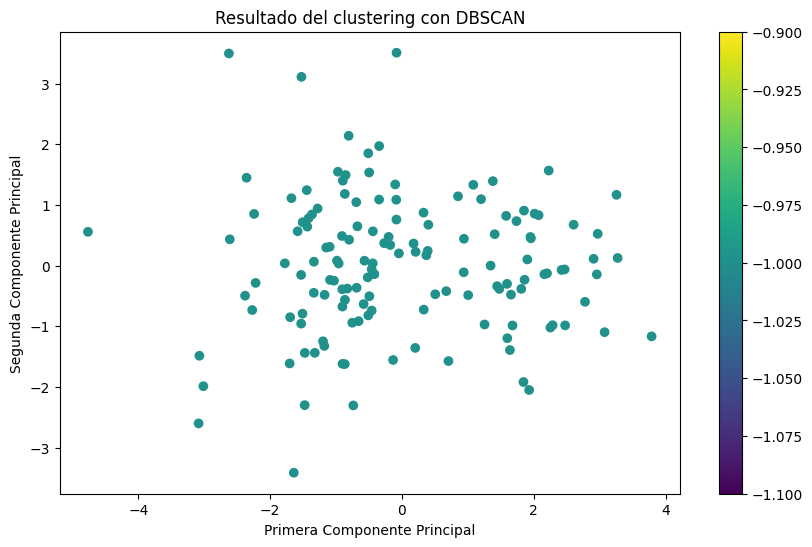

In [18]:
# Reducción de dimensionalidad para visualización si aún no está hecho
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Resultado del clustering con DBSCAN')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

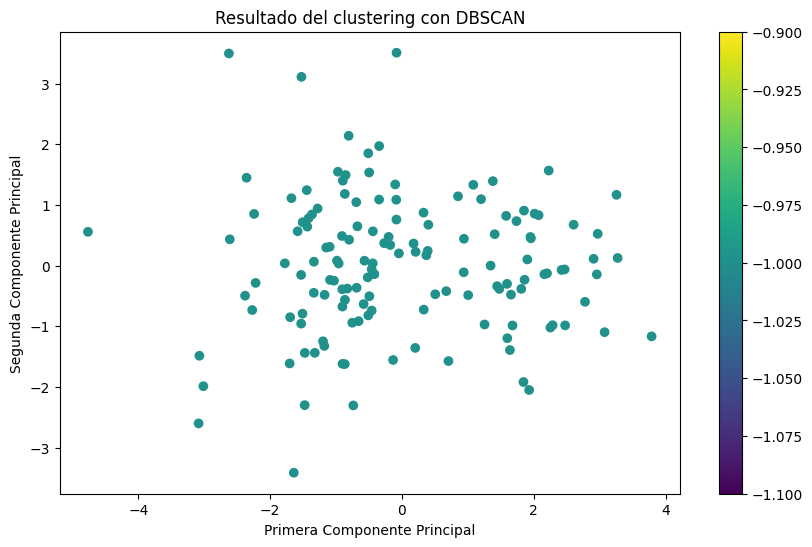

In [19]:
# Reducción de dimensionalidad para visualización
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Resultado del clustering con DBSCAN')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

In [20]:
# Número de clusters y puntos de ruido
print("Número total de clústers detectados: ", len(set(clusters))) # Número de clusters total. 2 clusters + 1 de ruido(outliers)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) # Restamos 1 si hay ruido. set(clusters) nos da los clusters únicos
n_noise = list(clusters).count(-1) # Contamos cuántos puntos hay en el cluster de ruido. Son los puntos que tienen cluster -1
print(f'Número de clústers reales: {n_clusters}')
print(f'Número de puntos de ruido: {n_noise}')

Número total de clústers detectados:  1
Número de clústers reales: 0
Número de puntos de ruido: 140


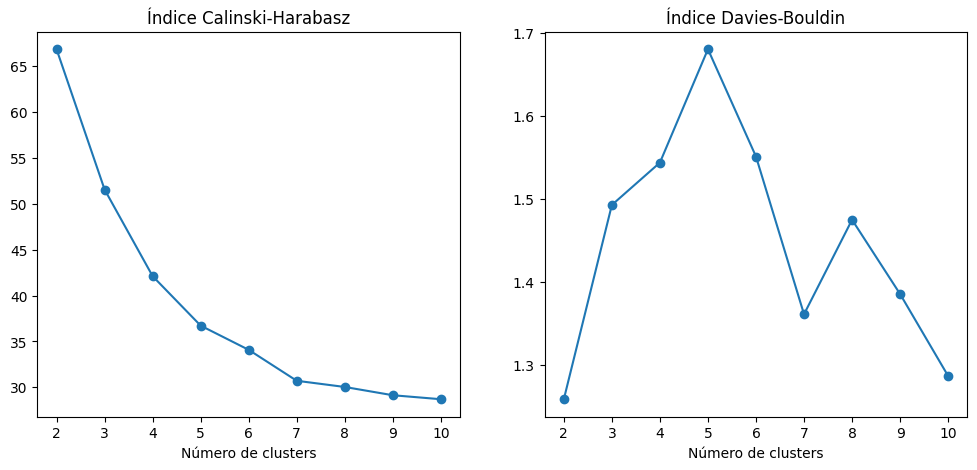

In [21]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Para diferentes valores de k en K-Means
k_range = range(2, 11)
ch_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_scaled)
    ch_scores.append(calinski_harabasz_score(df_scaled, labels))
    db_scores.append(davies_bouldin_score(df_scaled, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Índice Calinski-Harabasz')
plt.xlabel('Número de clusters')

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Índice Davies-Bouldin')
plt.xlabel('Número de clusters')
plt.show()